In [1]:
pip install gensim matplotlib scikit-learn

  Using cached smart_open-7.5.0-py3-none-any.whl.metadata (24 kB)
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
    --------------------------------------- 0.5/24.4 MB 2.3 MB/s eta 0:00:11
   - -------------------------------------- 0.8/24.4 MB 1.7 MB/s eta 0:00:14
   -- ------------------------------------- 1.3/24.4 MB 2.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.8/24.4 MB 2.1 MB/s eta 0:00:11
   --- ------------------------------------ 2.4/24.4 MB 2.1 MB/s eta 0:00:11
   ---- ----------------------------------- 2.9/24.4 MB 2.2 MB/s eta 0:00:10
   ----- ---------------------------------- 3.1/24.4 MB 2.2 MB/s eta 0:00:10
   ------ --------------------------------- 3.7/24.4 MB 2.1 MB/s eta 0:00:10
   ------ --------------------------------- 4.2/24.4 MB 2.2 MB/s eta 0:00:10
   ------- -------------------------------- 4.5/24.4 MB 2.1 MB/s eta 0:00:10
   -------- ------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip

SyntaxError: unexpected character after line continuation character (2310891068.py, line 1)

In [1]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
print("Loading GloVe embeddings...")
glove = api.load("glove-wiki-gigaword-50")
print("GloVe loaded successfully!")


Loading GloVe embeddings...
[==================================================] 100.0% 66.0/66.0MB downloaded
GloVe loaded successfully!


In [3]:
glove.most_similar("king", topn=5)


[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721)]

In [4]:
glove.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904)]

In [5]:
words = [
    "king", "queen", "man", "woman",
    "boy", "girl", "prince", "princess",
    "apple", "banana", "fruit",
    "car", "bike", "vehicle"
]

vectors = np.array([glove[word] for word in words])


In [6]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

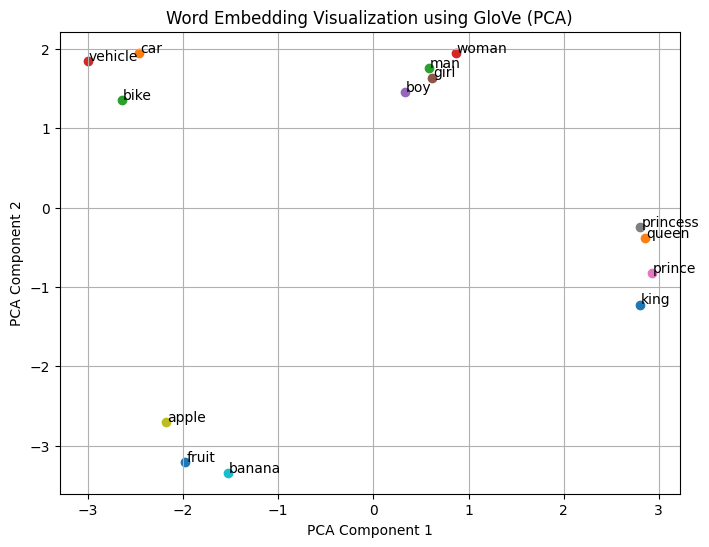

In [7]:
plt.figure(figsize=(8, 6))

for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(
        reduced_vectors[i, 0] + 0.01,
        reduced_vectors[i, 1] + 0.01,
        word
    )

plt.title("Word Embedding Visualization using GloVe (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()

In [8]:
for word in ["car", "apple", "king"]:
    print(f"\nSimilar words to '{word}':")
    for similar_word, score in glove.most_similar(word, topn=5):
        print(similar_word, score)


Similar words to 'car':
truck 0.92085862159729
cars 0.8870189785957336
vehicle 0.8833683729171753
driver 0.8464019298553467
driving 0.8384189009666443

Similar words to 'apple':
blackberry 0.7543067336082458
chips 0.7438644170761108
iphone 0.7429664134979248
microsoft 0.7334205508232117
ipad 0.7331036329269409

Similar words to 'king':
prince 0.8236179351806641
queen 0.7839043140411377
ii 0.7746230363845825
emperor 0.7736247777938843
son 0.766719400882721
